# Proyek Analisis Data: Analisis Sewa Sepeda dari Dataset Bike Sharing
- **Nama:** Wahyu Pratama
- **Email:** wdicoding@gmail.com
- **ID Dicoding:** wahyupratamaa

# Extrak Dataset

In [17]:
import zipfile
import os

zip_file = "dashboard/Bike-sharing-dataset.zip"
extract_folder = "data"

os.makedirs(extract_folder, exist_ok=True)

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)


## Menentukan Pertanyaan Bisnis

- "Bagaimana pengaruh cuaca dan hari dalam seminggu terhadap jumlah sepeda yang disewa?"
- "Apakah ada tren musiman atau pola berdasarkan waktu dalam sehari yang mempengaruhi jumlah sewa sepeda?"


## Import Semua Packages/Library yang Digunakan

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import os

## Data Wrangling

### Gathering Data

In [5]:
day_data = pd.read_csv("data/day.csv")
hour_data = pd.read_csv("data/hour.csv")

### Assessing Data

In [6]:
day_data.head(), hour_data.head()

(   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1        0        6           0   
 1        2  2011-01-02       1   0     1        0        0           0   
 2        3  2011-01-03       1   0     1        0        1           1   
 3        4  2011-01-04       1   0     1        0        2           1   
 4        5  2011-01-05       1   0     1        0        3           1   
 
    weathersit      temp     atemp       hum  windspeed  casual  registered  \
 0           2  0.344167  0.363625  0.805833   0.160446     331         654   
 1           2  0.363478  0.353739  0.696087   0.248539     131         670   
 2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
 3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
 4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
 
     cnt  
 0   985  
 1   801  
 2  1349  
 3  1562  
 4  1600  ,
    i

### Cleaning Data

In [7]:
day_data.isnull().sum(), hour_data.isnull().sum()


(instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
 instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 hr            0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64)

## Exploratory Data Analysis (EDA)

### Explore ...

In [8]:
day_data.dropna(inplace=True)
hour_data.dropna(inplace=True)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


/var/folders/dp/ywbj5v353sn30pwhx9ygvs5c0000gn/T/ipykernel_11507/1967233640.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=day_data['weathersit'], y=day_data['cnt'], palette='coolwarm')


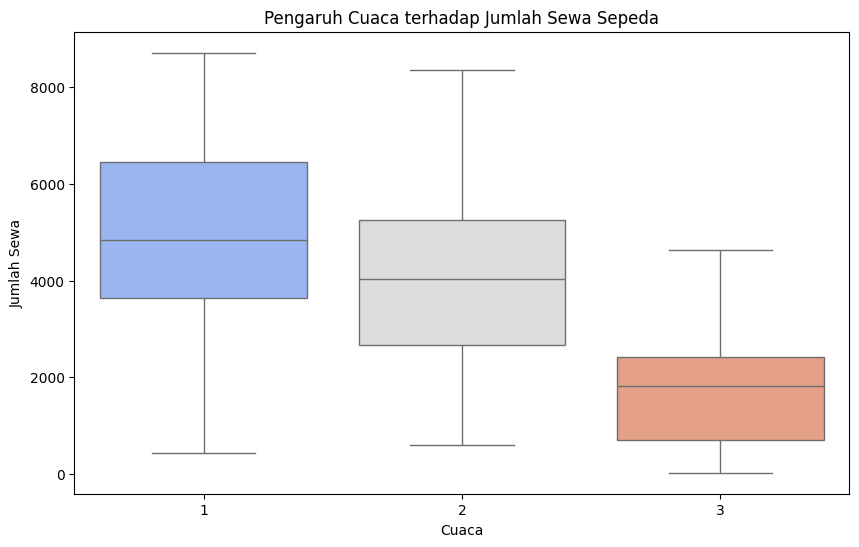

/var/folders/dp/ywbj5v353sn30pwhx9ygvs5c0000gn/T/ipykernel_11507/1967233640.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=day_data['weekday'], y=day_data['cnt'], palette='Set2')


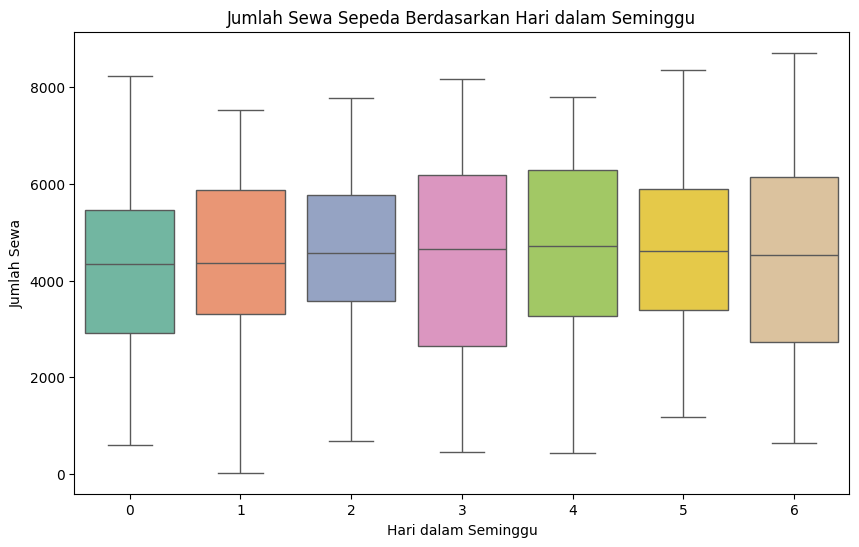

In [10]:
print(day_data.columns)
plt.figure(figsize=(10,6))
sns.boxplot(x=day_data['weathersit'], y=day_data['cnt'], palette='coolwarm') 
plt.title('Pengaruh Cuaca terhadap Jumlah Sewa Sepeda')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Sewa')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x=day_data['weekday'], y=day_data['cnt'], palette='Set2')  
plt.title('Jumlah Sewa Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Sewa')
plt.show()


### Pertanyaan 2:

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


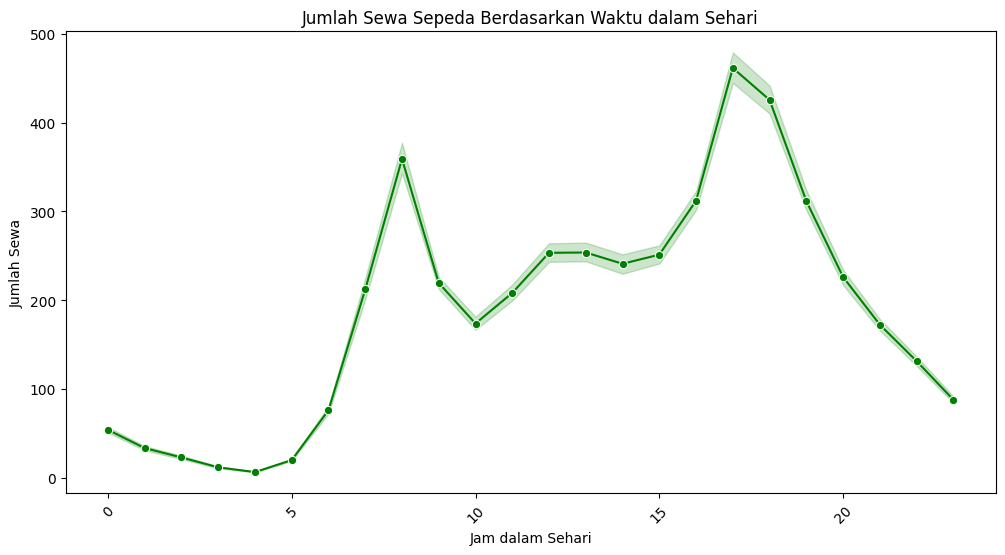

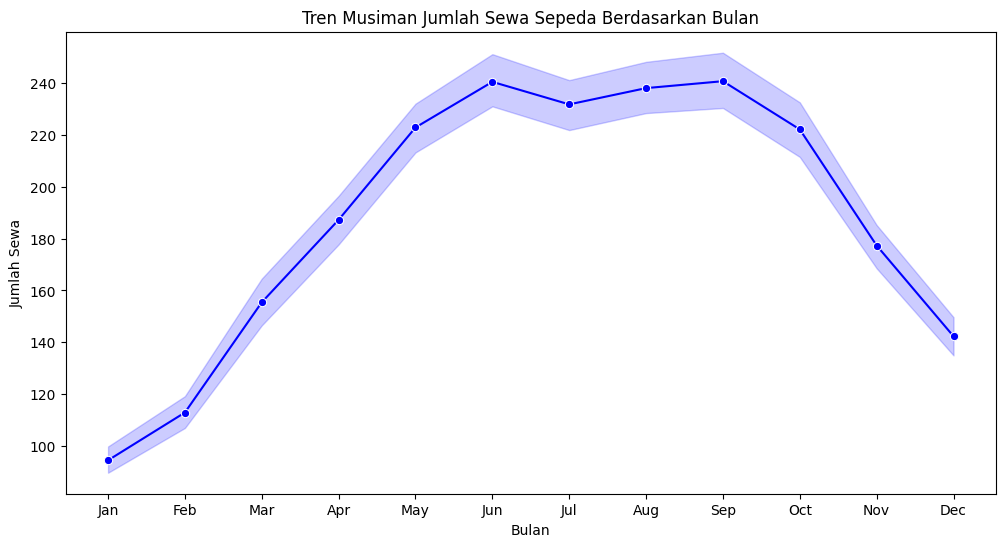

In [15]:
print(hour_data.columns)
plt.figure(figsize=(12,6))
sns.lineplot(x=hour_data['hr'], y=hour_data['cnt'], marker='o', color='green')
plt.title('Jumlah Sewa Sepeda Berdasarkan Waktu dalam Sehari')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Sewa')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,6))
sns.lineplot(x=hour_data['mnth'], y=hour_data['cnt'], marker='o', color='blue')
plt.title('Tren Musiman Jumlah Sewa Sepeda Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Sewa')
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()


## Conclusion

- Dari hasil analisis, kita dapat melihat bahwa faktor cuaca, suhu, dan hari dalam seminggu memiliki dampak yang signifikan 
terhadap jumlah sewa sepeda. Tren musiman juga menunjukkan pola-pola yang dapat dimanfaatkan untuk meningkatkan strategi 
pemasaran atau mengoptimalkan sistem peminjaman sepeda.